# **Problem Statement**
In an increasingly dynamic financial landscape, XYZ Financial Services, a leading commercial bank, faces the critical challenge of accurately predicting credit risk. The goal of this project is to develop a predictive model that estimates the probability of credit default based on credit card owners' characteristics, such as age, gender, education, marital status, credit limit, and payment history. By accurately predicting default probabilities, XYZ Financial Services can make informed lending decisions, optimize risk management strategies, and enhance financial stability.

## **Dataset Information**
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- **Dataset Name and Source**
    - **Name:** UCI_Credit_Card.csv
    - **Source:** This dataset is originally from the UCI Machine Learning Repository. ([Dataset source link](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset))
    - **Number of Instances (Rows):** 30,000
    - **Number of Attributes (Columns):** 25

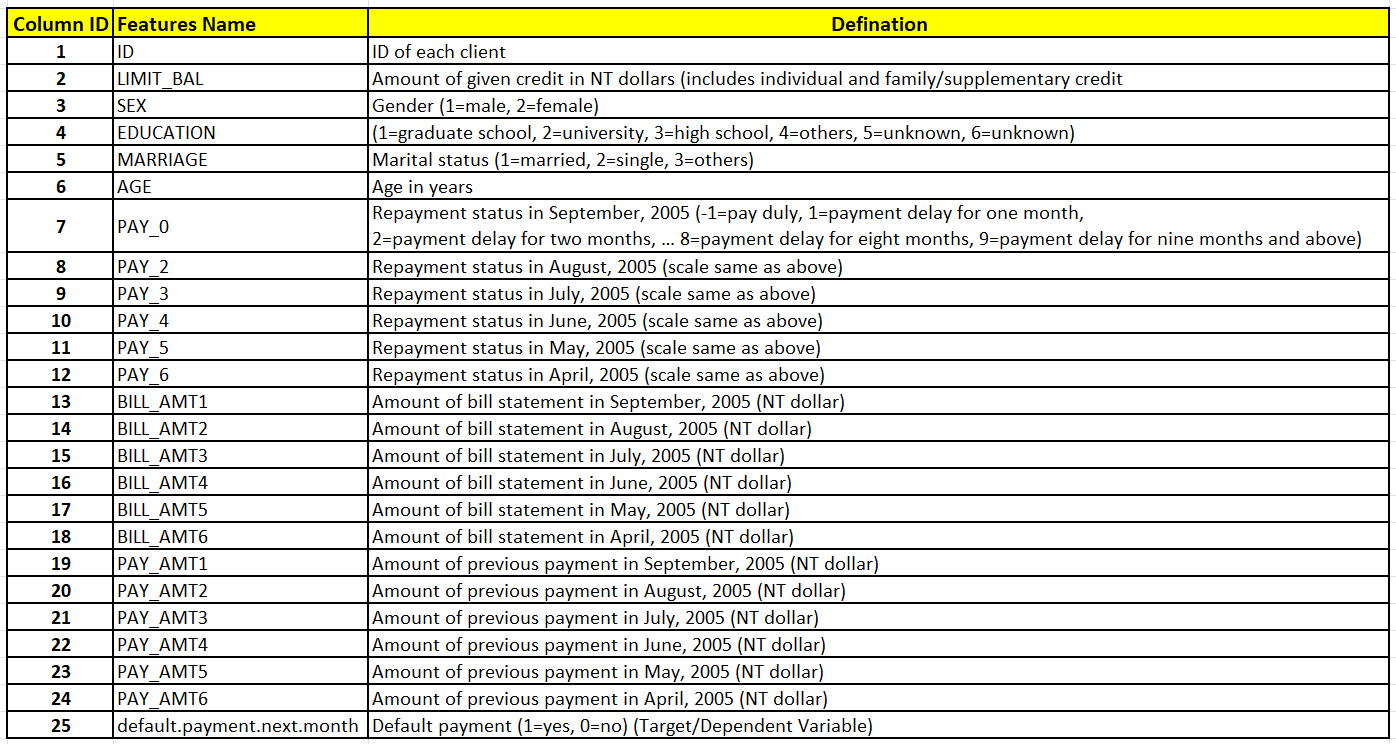

In [ ]:
# Displaying all features information
import os
from IPython.display import Image

data_dir = "datasets"
image_path = os.path.join(data_dir, "Dataset Information.png")
Image(filename=image_path)

## **Target Variable**
- **default.payment.next.month**: A binary variable indicating whether a credit card owner will default on their payment in the next month (1 = default, 0 = no default), as provided in the UCI Credit Card dataset.

## **Requirements**
- **Binary Classification**: The model should classify credit card clients into two categories: those who will default on their payment in the next month and those who will not.
- **Performance Metrics**: The model's performance should be evaluated using appropriate metrics for binary classification, such as Accuracy, Precision, Recall, F1-Score, ROC-AUC, and Confusion Matrix, to ensure a comprehensive understanding of its effectiveness in identifying defaults while minimizing false negatives.
- **Business Goal**: The predictions should enable XYZ Financial Services to identify high-risk credit clients and tailor risk mitigation strategies, such as adjusting credit limits or offering targeted financial counseling, to reduce default rates and improve portfolio health.

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **1. Data Exploration**

## **1.1 Loading the Dataset**

In [96]:
# Defining the path to the datasets folder
dataset_path = os.path.join(data_dir, "UCI_Credit_Card.csv")

# Loading the CSV file into a DataFrame
df = pd.read_csv(dataset_path)

# Displaying the first few rows to confirm loading
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## **1.2 Inspecting Dataset Structure**

In [89]:
# Checking the number of rows and columns
df.shape


(30000, 25)

- The dataset is correctly loaded and contains 30,000 rows and 25 columns which exactly matches the expected dimensions given in the dataset information.

In [90]:
# Checking column names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

- All the column names are displayed correctly, and they match the expected names from the dataset information.

In [91]:
# Checking data types of each column
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

- All columns have the correct data types as expected from the dataset information, with no discrepancies in data types.

In [84]:
# Displaying DataFrame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

- All the columns have 30,000 non-null values, indicating that there are no missing values in the dataset.
- The dataset have 13 float64 columns, 12 int64 columns, which is consistent with the expected data types for the given attributes.

In [92]:
# Checking for duplicates
df.duplicated().sum()

0

- There are no duplicate rows in the dataset, ensuring the integrity of the data for analysis.

### **Key observations from Inspecting Dataset**
Based on the dataset and inspected structure:

- **Rows**: 30,000 credit card clients.
- **Columns**: 25, including Target variable `default.payment.next.month`.
- **Data Types**: Mostly int64 for categorical/ordinal and float64 for monetary values.
- **Missing Values**: None, all columns have 30,000 non-null values.
- **Duplicate Rows**: None, ensuring data integrity.

## **1.3 Understanding Variables**

In [ ]:
# Renaming Columns names for clarity and consistency
column_renames = {
    'ID': 'ID',
    'LIMIT_BAL': 'Credit_Limit',
    'SEX': 'Gender',
    'EDUCATION': 'Education_Level',
    'MARRIAGE': 'Marital_Status',
    'AGE': 'Age',
    'PAY_0': 'Sept_Pay',
    'PAY_2': 'Aug_Pay',
    'PAY_3': 'July_Pay',
    'PAY_4': 'June_Pay',
    'PAY_5': 'May_Pay',
    'PAY_6': 'Apr_Pay',
    'BILL_AMT1': 'Sept_Bill_Amt',
    'BILL_AMT2': 'Aug_Bill_Amt',
    'BILL_AMT3': 'July_Bill_Amt',
    'BILL_AMT4': 'June_Bill_Amt',
    'BILL_AMT5': 'May_Bill_Amt',
    'BILL_AMT6': 'Apr_Bill_Amt',
    'PAY_AMT1': 'Sept_Pay_Amt',
    'PAY_AMT2': 'Aug_Pay_Amt',
    'PAY_AMT3': 'July_Pay_Amt',
    'PAY_AMT4': 'June_Pay_Amt',
    'PAY_AMT5': 'May_Pay_Amt',
    'PAY_AMT6': 'Apr_Pay_Amt',
    'default.payment.next.month': 'default_payment_next_month'
}

# Renaming the columns in the DataFrame
df = df.rename(columns=column_renames)

# Verifying the new column names
df.columns

Index(['ID', 'Credit_Limit', 'Gender', 'Education_Level', 'Marital_Status',
       'Age', 'Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay',
       'Apr_Pay', 'Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt',
       'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt', 'Sept_Pay_Amt',
       'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt',
       'Apr_Pay_Amt', 'default_payment_next_month'],
      dtype='object')

In [105]:
# Displaying random 10 rows
df.sample(10)

,ID,Credit_Limit,Gender,Education_Level,Marital_Status,Age,Sept_Pay,Aug_Pay,July_Pay,June_Pay,...,June_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,July_Pay_Amt,June_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,default_payment_next_month
8685,8686,50000.0,2,2,2,23,0,0,0,0,...,10078.0,9654.0,9648.0,1649.0,1300.0,500.0,500.0,300.0,500.0,0
6015,6016,60000.0,2,2,1,49,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
16638,16639,50000.0,1,2,2,41,0,0,0,0,...,-39.0,-39.0,18056.0,2200.0,2200.0,0.0,0.0,20000.0,1000.0,0
15619,15620,220000.0,2,1,2,28,0,0,-1,-1,...,5637.0,23054.0,10730.0,5000.0,5806.0,5637.0,23054.0,0.0,2406.0,0
18241,18242,190000.0,1,2,1,50,1,2,2,2,...,21087.0,22732.0,22228.0,0.0,3100.0,0.0,2000.0,0.0,1900.0,1
11818,11819,50000.0,1,3,1,59,0,0,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
933,934,30000.0,1,2,2,32,2,0,0,2,...,11112.0,12923.0,12566.0,1500.0,3000.0,0.0,2000.0,0.0,1000.0,1
22591,22592,210000.0,2,3,2,36,0,0,0,0,...,61330.0,62394.0,63912.0,3000.0,3000.0,2804.0,3000.0,3000.0,2468.0,0
2381,2382,400000.0,1,1,1,44,0,0,0,0,...,91816.0,57477.0,66203.0,4652.0,3565.0,2731.0,10031.0,16027.0,25000.0,0
28019,28020,30000.0,2,2,2,29,2,0,0,0,...,0.0,0.0,0.0,1385.0,5000.0,0.0,0.0,0.0,0.0,1


- **ID**: Unique identifier (we will not use for modeling).
- **Credit_Limit**: Credit limit (continuous, float64).
- **Gender, Education_Level, Marital_Status**: Categorical variables encoded as integers.
- **Age**: Continuous, integer.
- **Sept_Pay to Apr_Pay**: Payment status (ordinal, e.g., -1, 0, 1, 2 indicating months of delay or paid).
- **Sept_Bill_Amt to Apr_Bill_Amt**: Bill amounts for six months (float64).
- **Sept_Pay_Amt to Apr_Pay_Amt**: Payment amounts for six months (float64).
- **default_payment_next_month**: Target variable (0 = no default, 1 = default, int64).

In [99]:
# Defining categorical columns based on dataset information
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay', 'Apr_Pay', 'default_payment_next_month']

# Displaying unique values in each categorical column
for col in categorical_columns:
    print(f"{col}: {df[col].unique().tolist()}")

Gender: [2, 1]
Education_Level: [2, 1, 3, 5, 4, 6, 0]
Marital_Status: [1, 2, 3, 0]
Sept_Pay: [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
Aug_Pay: [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
July_Pay: [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
June_Pay: [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
May_Pay: [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
Apr_Pay: [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
default_payment_next_month: [1, 0]


- Education_Level has unexpected value (0) that may need cleaning.
- Marital_Status includes 0, which may represent missing or undefined status.
- Sept_Pay to Apr_Pay include values like -2, which may represent missing or undefined status.

In [103]:
# Define numerical columns
numerical_columns = ['Credit_Limit', 'Age', 'Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt', 'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt', 'Sept_Pay_Amt', 'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt', 'Apr_Pay_Amt']

# Display summary statistics for numerical variables
df[numerical_columns].describe().astype(int)

,Credit_Limit,Age,Sept_Bill_Amt,Aug_Bill_Amt,July_Bill_Amt,June_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,July_Pay_Amt,June_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
mean,167484,35,51223,49179,47013,43262,40311,38871,5663,5921,5225,4826,4799,5215
std,129747,9,73635,71173,69349,64332,60797,59554,16563,23040,17606,15666,15278,17777
min,10000,21,-165580,-69777,-157264,-170000,-81334,-339603,0,0,0,0,0,0
25%,50000,28,3558,2984,2666,2326,1763,1256,1000,833,390,296,252,117
50%,140000,34,22381,21200,20088,19052,18104,17071,2100,2009,1800,1500,1500,1500
75%,240000,41,67091,64006,60164,54506,50190,49198,5006,5000,4505,4013,4031,4000
max,1000000,79,964511,983931,1664089,891586,927171,961664,873552,1684259,896040,621000,426529,528666


- Credit_Limit ranges from 10,000 to 1,000,000 NTD, indicating a wide range of credit limits.
- Age ranges from 21 to 79, which is reasonable.
- Sept_Bill_Amt to Apr_Bill_Amt can be negative (overpayments) or very large (high credit usage).
- Sept_Pay_Amt to Apr_Pay_Amt include zero (no payment) and large values, suggesting varied payment behaviors.

In [106]:
# Define target column
target_column = 'default_payment_next_month'

# Displaying the value counts of the target variable
df[target_column].value_counts(normalize=True) * 100


default_payment_next_month
0    77.88
1    22.12
Name: proportion, dtype: float64

- default_payment_next_month (target variable) is imbalanced with 77.88% 0s and 22.12% 1s, suggesting a need for handling imbalance later.

### **Key Insights from Understanding Variables**
- **Variable Overview**:
    - **ID**: Unique identifier (we will not use for modeling).
    - **Credit_Limit**: Credit limit (continuous, float64).
    - **Gender, Education_Level, Marital_Status**: Categorical variables encoded as integers.
    - **Age**: Continuous, integer.
    - **Sept_Pay to Apr_Pay**: Payment status (ordinal, e.g., -1, 0, 1, 2 indicating months of delay or paid).
    - **Sept_Bill_Amt to Apr_Bill_Amt**: Bill amounts for six months (float64).
    - **Sept_Pay_Amt to Apr_Pay_Amt**: Payment amounts for six months (float64).
    - **default_payment_next_month**: Target variable (0 = no default, 1 = default, int64).

- **Categorical Variables**: 
    - Education_Level has unexpected value (0) that may need cleaning.
    - Marital_Status includes 0, which may represent missing or undefined status.
    - Sept_Pay to Apr_Pay include values like -2, which may represent missing or undefined status.
- **Numerical Variables**:
    - Credit_Limit ranges from 10,000 to 1,000,000 NTD, indicating a wide range of credit limits.
    - Age ranges from 21 to 79, which is reasonable.
    - Sept_Bill_Amt to Apr_Bill_Amt can be negative (overpayments) or very large (high credit usage).
    - Sept_Pay_Amt to Apr_Pay_Amt include zero (no payment) and large values, suggesting varied payment behaviors.
- **Target Variable**:
    - default_payment_next_month (target variable) is imbalanced with 77.88% 0s and 22.12% 1s, suggesting a need for handling imbalance later.

## **1.4 Check Data Quality**

In [104]:
# Checking percentage of missing values
print((df.isnull().sum() / len(df)) * 100)

ID                            0.0
Credit_Limit                  0.0
Gender                        0.0
Education_Level               0.0
Marital_Status                0.0
Age                           0.0
Sept_Pay                      0.0
Aug_Pay                       0.0
July_Pay                      0.0
June_Pay                      0.0
May_Pay                       0.0
Apr_Pay                       0.0
Sept_Bill_Amt                 0.0
Aug_Bill_Amt                  0.0
July_Bill_Amt                 0.0
June_Bill_Amt                 0.0
May_Bill_Amt                  0.0
Apr_Bill_Amt                  0.0
Sept_Pay_Amt                  0.0
Aug_Pay_Amt                   0.0
July_Pay_Amt                  0.0
June_Pay_Amt                  0.0
May_Pay_Amt                   0.0
Apr_Pay_Amt                   0.0
default_payment_next_month    0.0
dtype: float64


### **Observations from missing values check:**
- The dataset is complete, there are no missing values.

In [14]:
# Checking for Inconsistencies in Categorical Variables
print("Checking for unexpected values in categorical variables:")
for col in categorical_columns:
    unique_values = df[col].unique()
    expected_values = {
        'Gender': [1, 2],
        'Education_Level': [1, 2, 3, 4, 5, 6],
        'Marital_Status': [1, 2, 3],
        'SEPT_PAY': list(range(-1, 10)),
        'AUG_PAY': list(range(-1, 10)),
        'JULY_PAY': list(range(-1, 10)),
        'JUNE_PAY': list(range(-1, 10)),
        'MAY_PAY': list(range(-1, 10)),
        'APR_PAY': list(range(-1, 10)),
        'Default': [0, 1]
    }
    unexpected = [x for x in unique_values if x not in expected_values[col]]
    if unexpected:
        print(f"{col}: Unexpected values found - {unexpected}")
    else:
        print(f"{col}: All values within expected range ({expected_values[col]})")

Checking for unexpected values in categorical variables:
Gender: All values within expected range ([1, 2])
Education_Level: Unexpected values found - [0]
Marital_Status: Unexpected values found - [0]
SEPT_PAY: Unexpected values found - [-2]
AUG_PAY: Unexpected values found - [-2]
JULY_PAY: Unexpected values found - [-2]
JUNE_PAY: Unexpected values found - [-2]
MAY_PAY: Unexpected values found - [-2]
APR_PAY: Unexpected values found - [-2]
Default: All values within expected range ([0, 1])


### **Observations from Inconsistencies in Categorical Variables**
- **Education_Level:**
    - Expected: [1, 2, 3, 4, 5, 6] (graduate school, university, high school, others, unknown, unknown).
    - Unexpected: [0] - This suggests some records have an education level of 0, which is not defined in the dataset documentation. This could indicate missing or invalid data.
- **Marital_Status:**
    - Expected: [1, 2, 3] (married, single, others).
    - Unexpected: [0] - This is not listed as a valid category and may represent missing or undefined marital status.
- **APR_PAY to SEPT_PAY:**
    - Expected: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9] (-1 = paid duly, 0 = delay <1 months, 1-9 = delay 1-9+ months).
    - Unexpected: [-2] - The dataset documentation does not mention -2, but it’s a common extension in this dataset meaning "no consumption" (i.e., no credit usage, hence no payment status). This should be considered valid, and the expected range needs adjustment.
- **Gender and Default:**
    - Both are within expected ranges, which is good.

In [15]:
# Detecting Outliers in Numerical Variables

# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# Check for outliers in each numerical column
print("Outlier detection in numerical variables:")
for col in numerical_columns:
    outlier_count, lower, upper = detect_outliers(df, col)
    total_count = len(df[col])
    outlier_percentage = (outlier_count / total_count) * 100
    print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%) (Lower bound: {lower:.2f}, Upper bound: {upper:.2f})")

Outlier detection in numerical variables:
Credit_Limit: 167 outliers (0.56%) (Lower bound: -235000.00, Upper bound: 525000.00)
Age: 272 outliers (0.91%) (Lower bound: 8.50, Upper bound: 60.50)
SEPT_BILL_AMT: 2400 outliers (8.00%) (Lower bound: -91739.62, Upper bound: 162389.38)
AUG_BILL_AMT: 2395 outliers (7.98%) (Lower bound: -88547.50, Upper bound: 155538.50)
JULY_BILL_AMT: 2469 outliers (8.23%) (Lower bound: -83581.50, Upper bound: 146412.50)
JUNE_BILL_AMT: 2622 outliers (8.74%) (Lower bound: -75942.12, Upper bound: 132774.88)
MAY_BILL_AMT: 2725 outliers (9.08%) (Lower bound: -70878.25, Upper bound: 122831.75)
APR_BILL_AMT: 2693 outliers (8.98%) (Lower bound: -70657.38, Upper bound: 121111.62)
SEPT_PAY_AMT: 2745 outliers (9.15%) (Lower bound: -5009.00, Upper bound: 11015.00)
AUG_PAY_AMT: 2714 outliers (9.05%) (Lower bound: -5417.50, Upper bound: 11250.50)
JULY_PAY_AMT: 2598 outliers (8.66%) (Lower bound: -5782.50, Upper bound: 10677.50)
JUNE_PAY_AMT: 2994 outliers (9.98%) (Lower bou

In [16]:
# Create output directory for visualizations
visualization_outputs = os.path.join(os.getcwd(), "visualization_outputs")
os.makedirs(visualization_outputs, exist_ok=True)

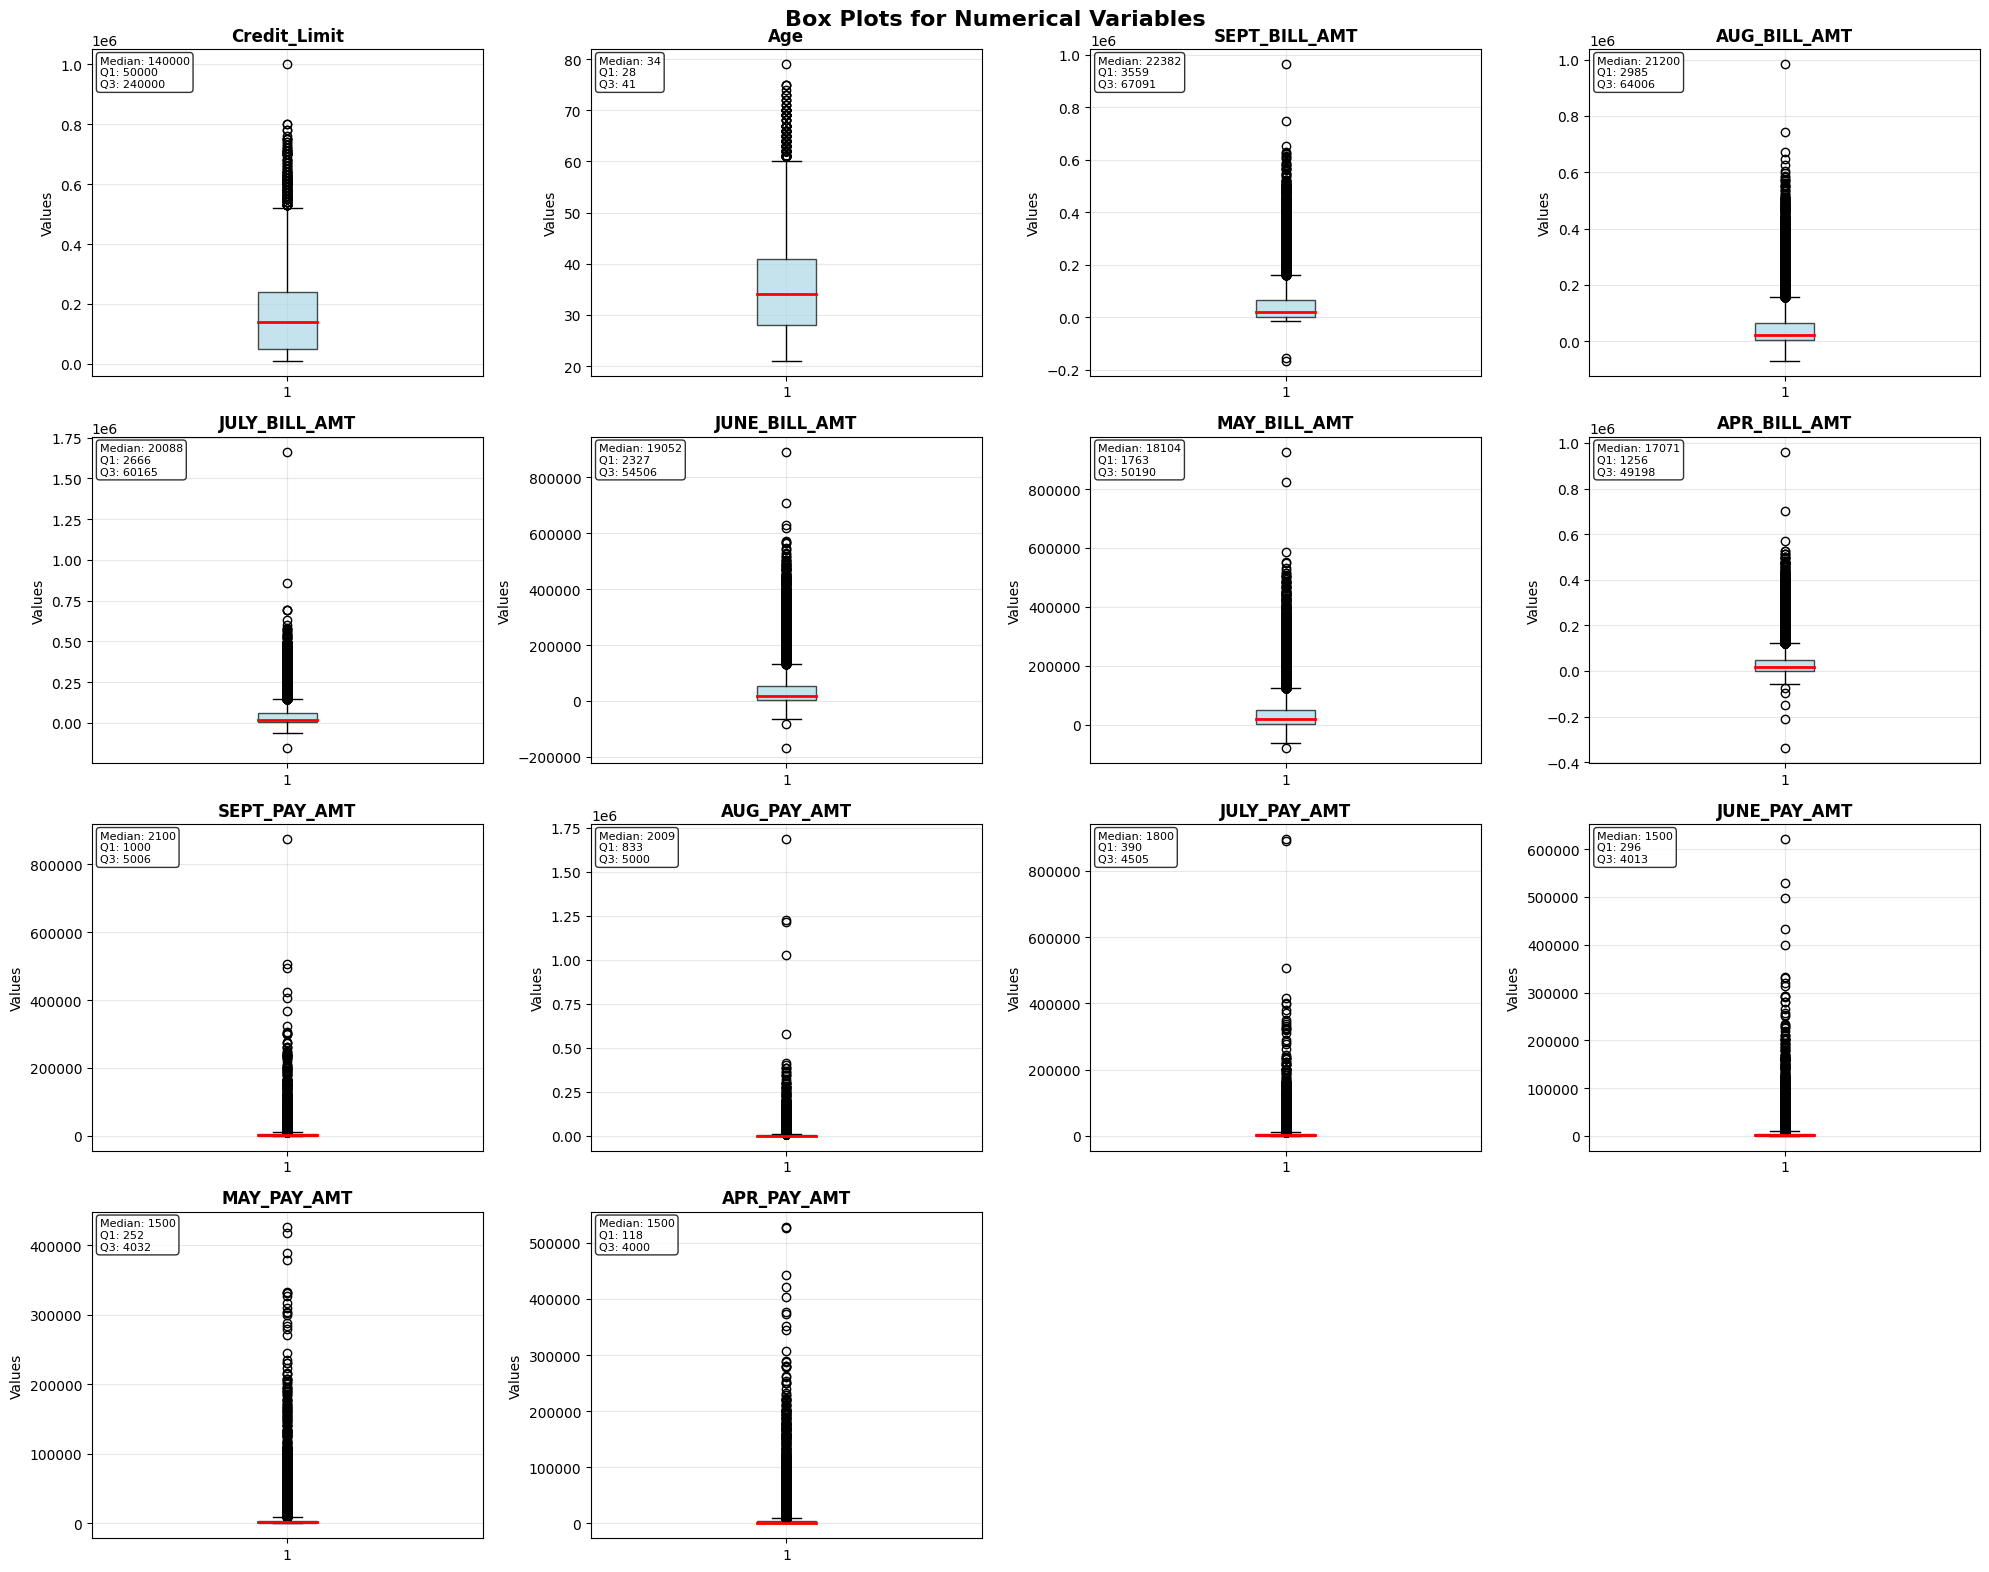

In [24]:
# Create box plots for numerical columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
fig.suptitle('Box Plots for Numerical Variables', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes = axes.flatten()

# Create box plots for each numerical column
for i, col in enumerate(numerical_columns):
    if i < len(axes):
        # Create box plot
        axes[i].boxplot(df[col].dropna(), patch_artist=True, 
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2))
        axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Values')
        axes[i].grid(True, alpha=0.3)
        
        # Add some statistics as text
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        median = df[col].median()
        axes[i].text(0.02, 0.98, f'Median: {median:.0f}\nQ1: {q1:.0f}\nQ3: {q3:.0f}', 
                    transform=axes[i].transAxes, verticalalignment='top', 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                    fontsize=8)

# Hide any unused subplots
for i in range(len(numerical_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'box_plots_of_numerical_variables.png'))

plt.show()

### **Observations from Outliers Detection in Numerical Variables:**
- **Low Outlier Percentages:** Credit_Limit (0.56%) and Age (0.91%) have minimal outliers, suggesting good data integrity overall.
- **High Outlier Percentages:** BILL_AMT (8–9%) and PAY_AMT (8.66–9.98%) have significant outliers, reflecting the dataset’s natural variability in credit usage and payments.
- **Negative Values:**
    - Negative BILL_AMT outliers are valid (overpayments).
- **AGE Outliers:** Values above 60.50 are likely fine.
- **Action Items:**
    - We will decide whether to cap, remove, or retain other outliers based on domain knowledge.

### **Key Insights from Data Quality Check**
- **Missing Values:** None
- **Inconsistencies:**
    - Education_Level and Marital_Status have unexpected 0s, possibly missing data.
    - APR_PAY to SEPT_PAY (value -2) is valid (no consumption) we can update expected ranges.
- **Outliers:** BILL_AMT and PAY_AMT have high outlier percentages; Credit_Limit and Age have low outlier percentages.
- **Action Items:** 
    - Handle 0s in Education_Level and Marital_Status in the Data Cleaning phase.
    - Handle BILL_AMT and PAY_AMT outliers in the Data Cleaning phase.

## **1.5 Data Visualization**

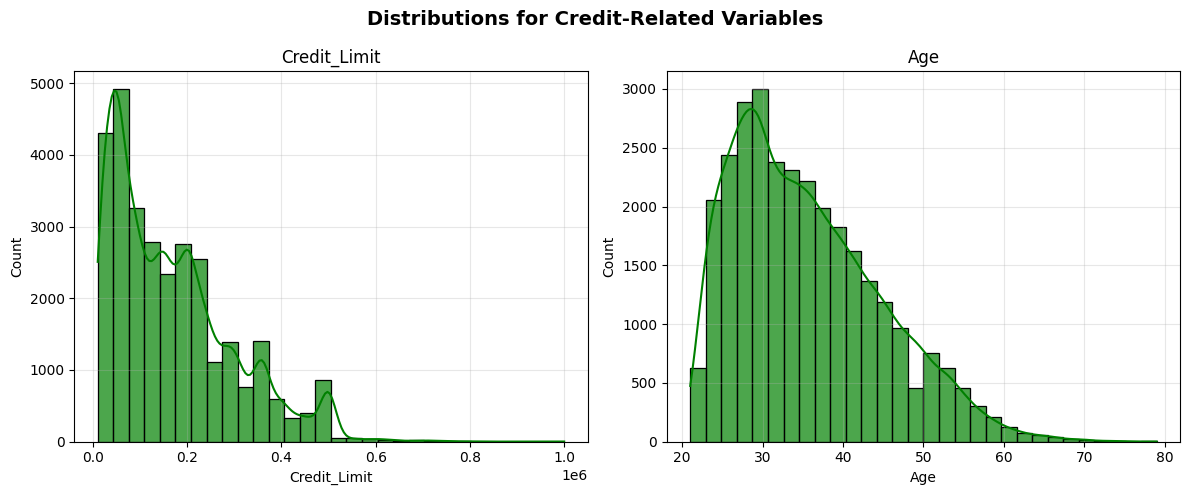

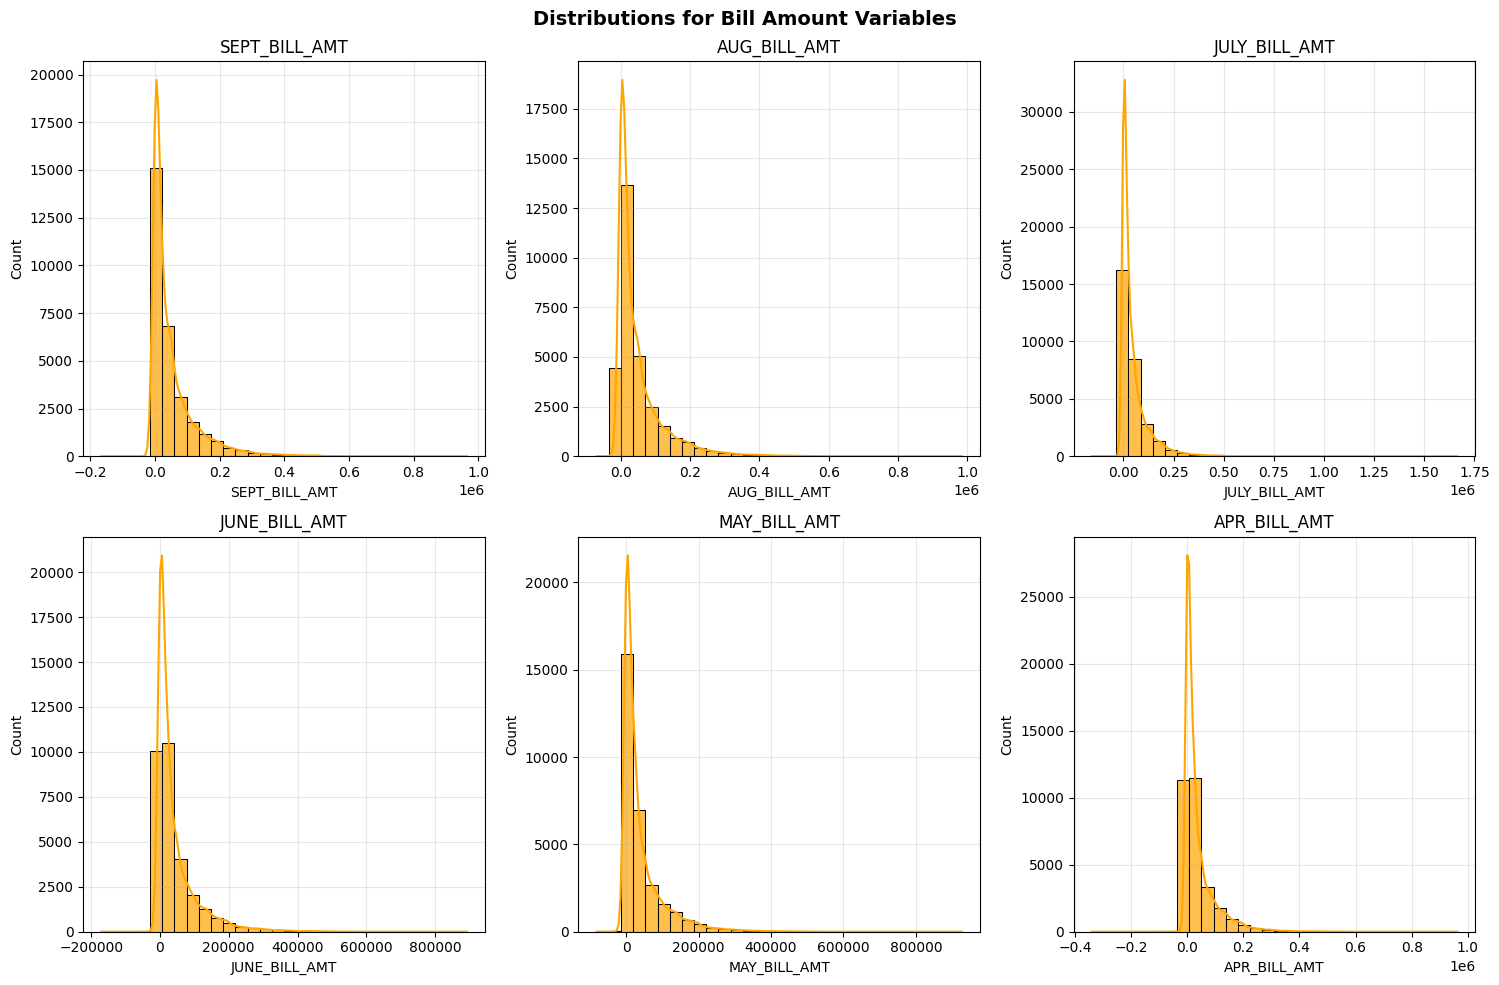

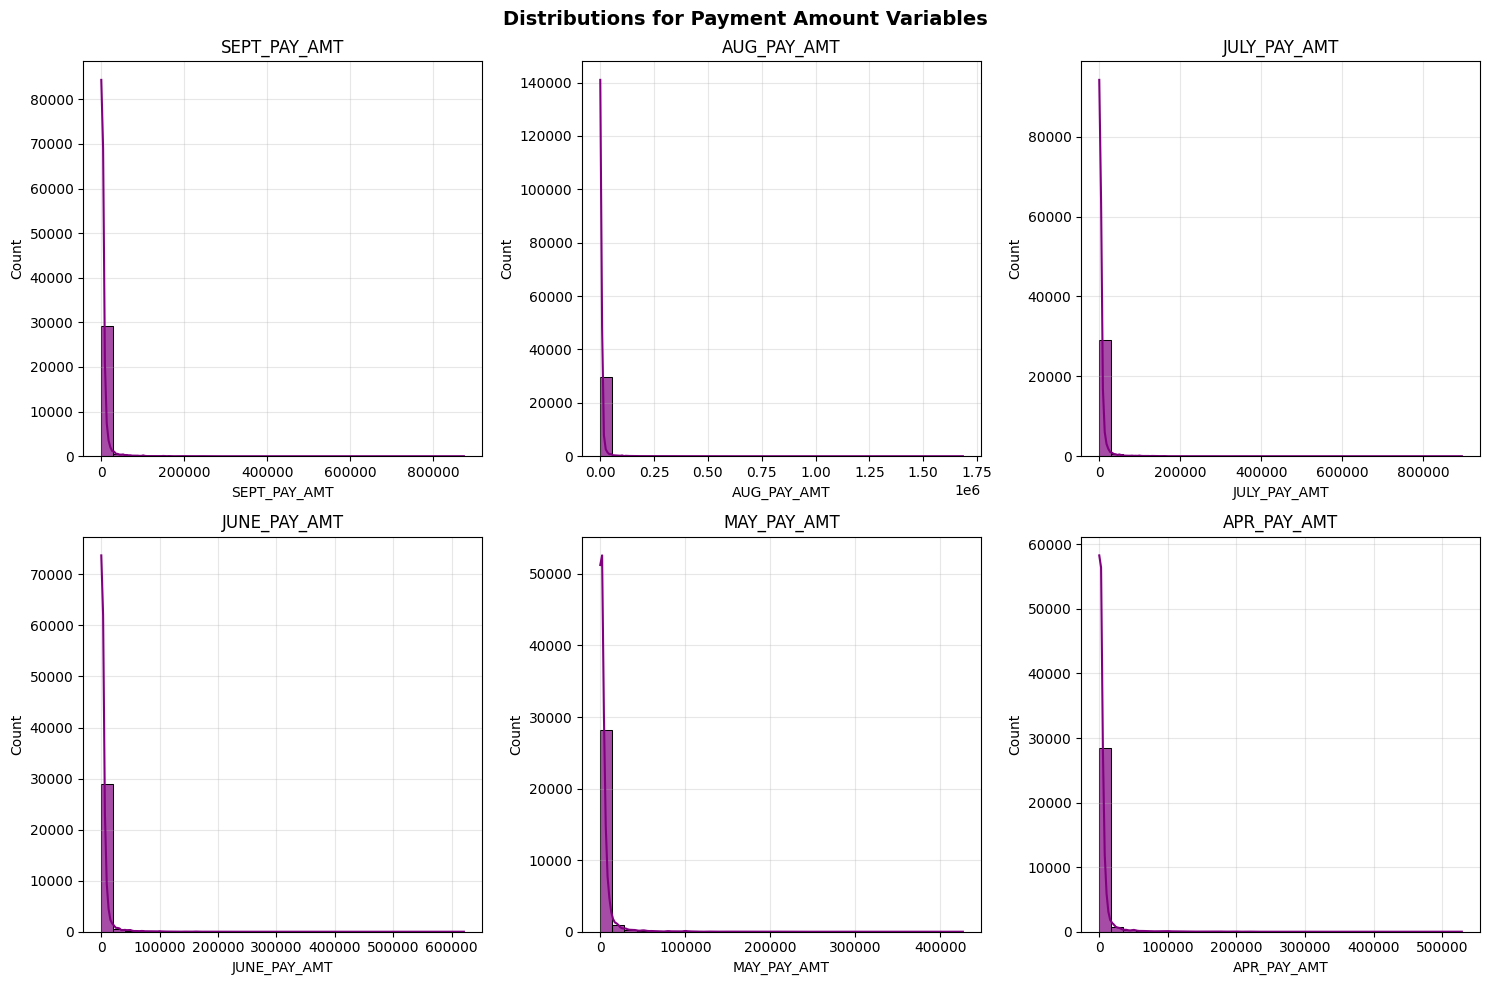

In [33]:
# Visualizing Distributions of Numerical Variables by categories

# Group variables for better analysis
credit_vars = ['Credit_Limit', 'Age']
bill_amt_columns = ['SEPT_BILL_AMT', 'AUG_BILL_AMT', 'JULY_BILL_AMT', 'JUNE_BILL_AMT', 'MAY_BILL_AMT', 'APR_BILL_AMT']
pay_amt_columns = ['SEPT_PAY_AMT', 'AUG_PAY_AMT', 'JULY_PAY_AMT', 'JUNE_PAY_AMT', 'MAY_PAY_AMT', 'APR_PAY_AMT']

# Credit-related variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distributions for Credit-Related Variables', fontsize=14, fontweight='bold')

for i, col in enumerate(credit_vars):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], color='green', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'histograms_of_credit_related_variables.png'))
plt.show()

# Bill amount variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distributions for Bill Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(bill_amt_columns):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], color='orange', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'histograms_of_bill_amounts.png'))
plt.show()

# Payment amount variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distributions for Payment Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(pay_amt_columns):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], color='purple', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'histograms_of_payment_amounts.png'))
plt.show()

### **Observations from Distributions of Numerical Variables**
- **Insights**
    - Credit_Limit: Right-skewed, with a peak around 100,000–200,000 NTD and a long tail (outliers > 525,000).
    - Age: Roughly normal, centered around 30–40, with outliers < 20.
    - BILL_AMT: Right-skewed, with negative values (overpayments) and high outliers.
    - PAY_AMT: Right-skewed, with peaks near 0 and outliers > 10,000; negative values visible.
- **Key Insights**:
    - Skewness suggests potential log transformation in modeling.

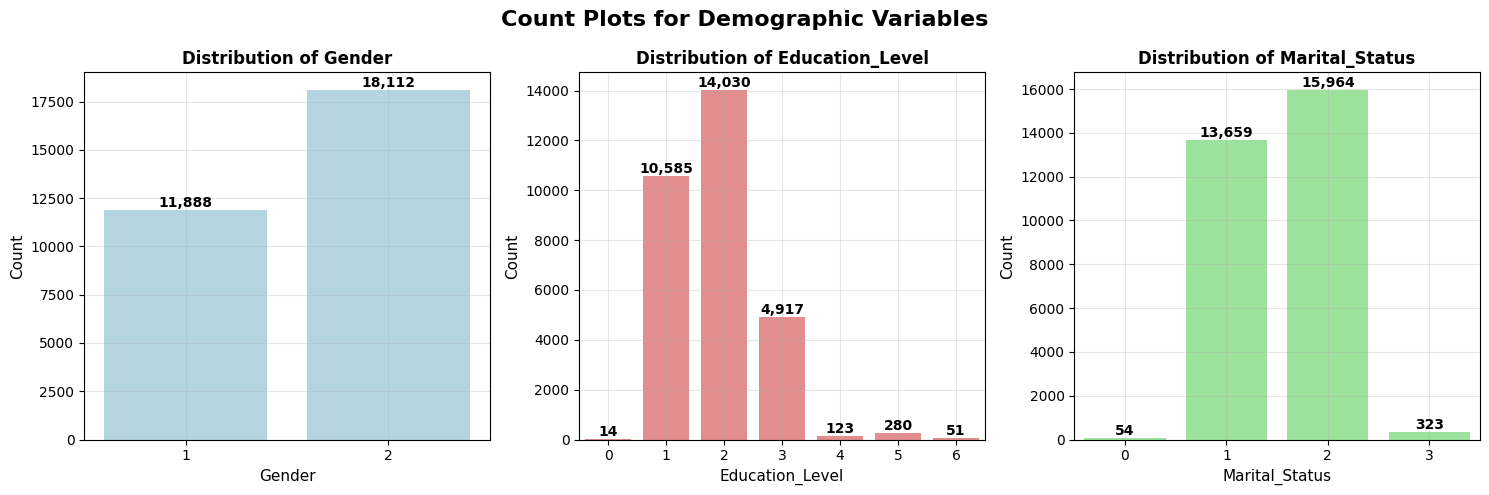

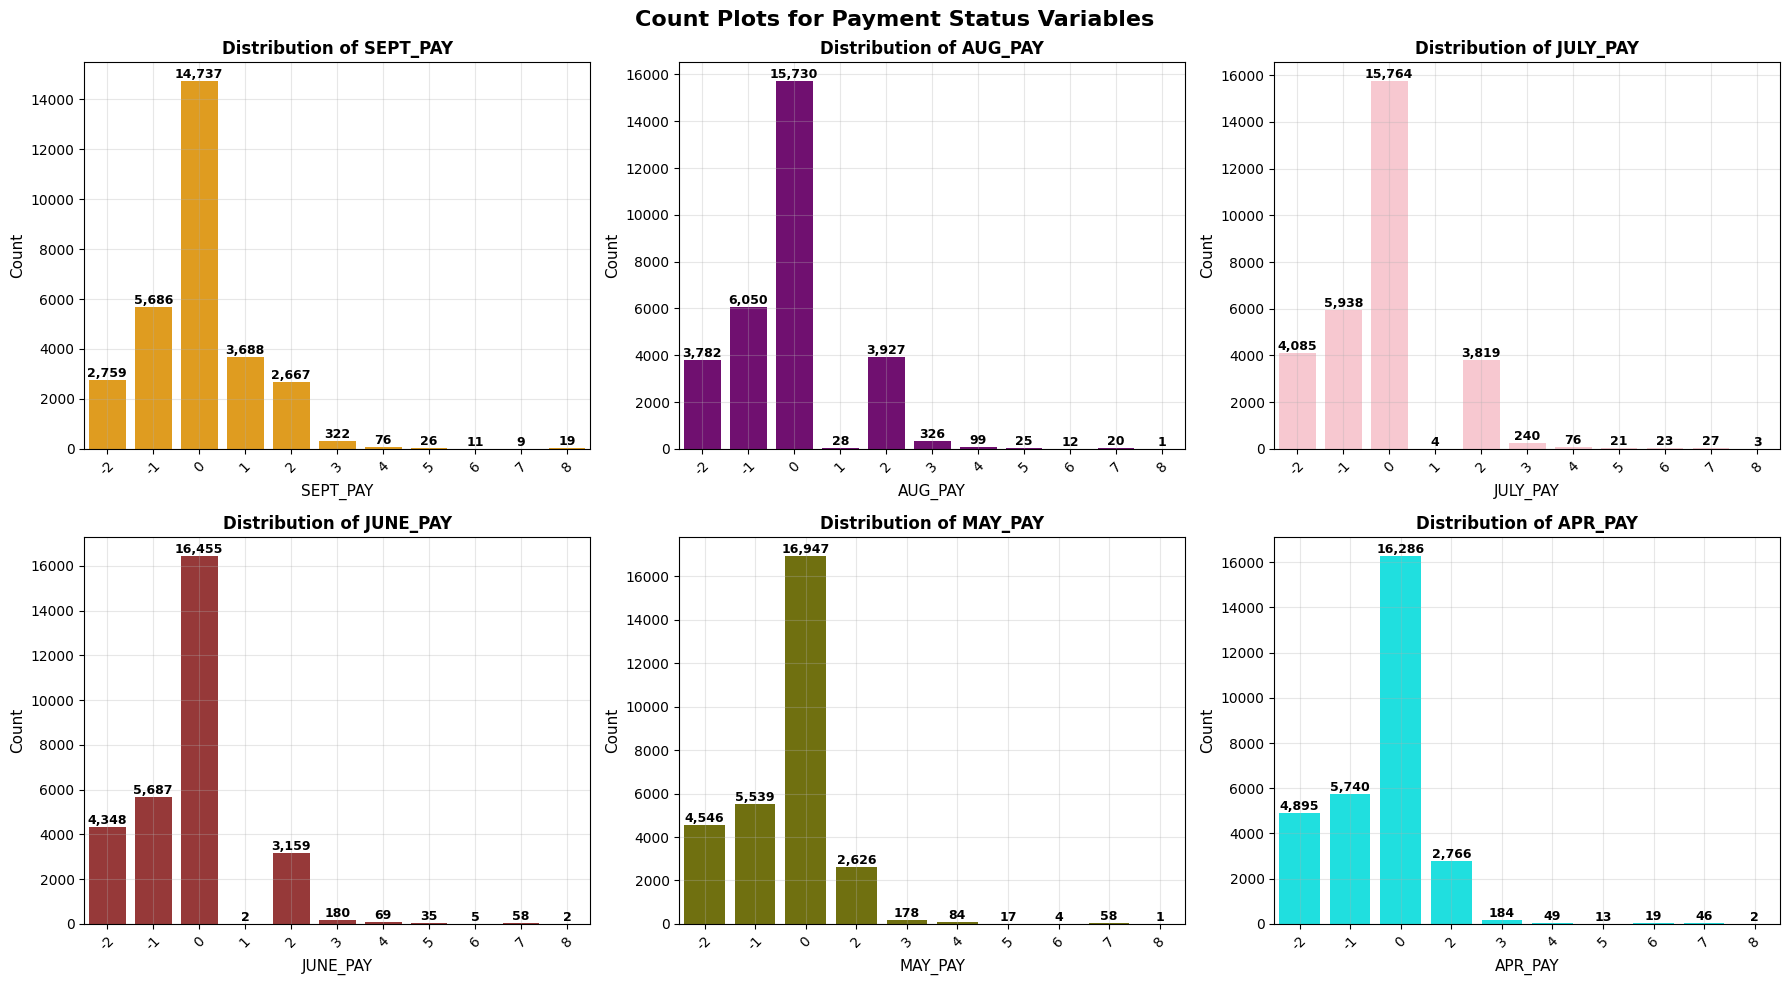

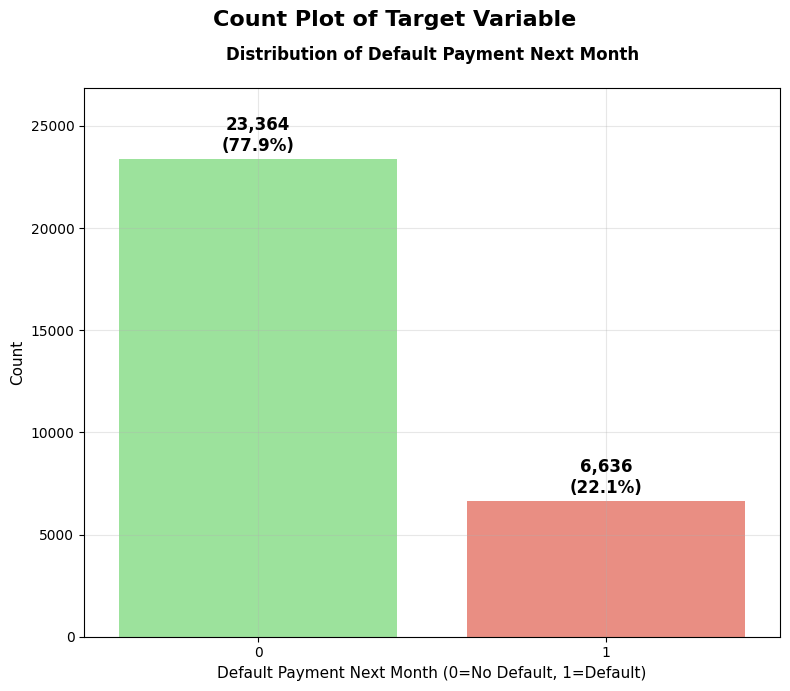

In [34]:
# Visualizing Distributions of Categorical Variables by groups

# Define the categorical variable groups
demographic_columns = ['Gender', 'Education_Level', 'Marital_Status']
payment_status_columns = ['SEPT_PAY', 'AUG_PAY', 'JULY_PAY', 'JUNE_PAY', 'MAY_PAY', 'APR_PAY']

# 1. Count plots for Demographic Variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Count Plots for Demographic Variables', fontsize=16, fontweight='bold')

colors_demo = ['lightblue', 'lightcoral', 'lightgreen']

for i, col in enumerate(demographic_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color=colors_demo[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)
    axes[i].grid(True, alpha=0.3)
    
    # Add count values on top of bars
    for p in axes[i].patches:
        height = int(p.get_height())
        axes[i].annotate(f'{height:,}', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'countplots_of_demographic_variables.png'))
plt.show()

# 2. Count plots for Payment Status Variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Count Plots for Payment Status Variables', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes = axes.flatten()
colors_payment = ['orange', 'purple', 'pink', 'brown', 'olive', 'cyan']

for i, col in enumerate(payment_status_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color=colors_payment[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)
    axes[i].grid(True, alpha=0.3)
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add count values on top of bars
    for p in axes[i].patches:
        height = int(p.get_height())
        axes[i].annotate(f'{height:,}', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'countplots_of_payment_status.png'))
plt.show()

# 3. Count plot for Target Variable
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
fig.suptitle('Count Plot of Target Variable', fontsize=16, fontweight='bold')

sns.countplot(data=df, x='Default', ax=ax, palette=['lightgreen', 'salmon'])
ax.set_title('Distribution of Default Payment Next Month', fontsize=12, fontweight='bold', pad=20)
ax.set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=11)
ax.set_ylabel('Count', fontsize=11)
ax.grid(True, alpha=0.3)

# Add count values and percentages on top of bars
total_count = len(df)
for p in ax.patches:
    height = int(p.get_height())
    percentage = (height / total_count) * 100
    ax.annotate(f'{height:,}\n({percentage:.1f}%)', 
               (p.get_x() + p.get_width()/2., p.get_height() + 200), 
               ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adjust y-axis limit to accommodate annotations
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'countplot_of_target_variable.png'))
plt.show()

### **Observations from Categorical Variable Groups Visualization**
- **Demographic Variables:**
    - **Gender**: The dataset has more females (around 60%) than males (around 40%), showing a gender imbalance.
    - **Education_Level**: Most credit card owners have university education (around 45%) or graduate school (around 35%). There are some records with value 0 (around 1%) which needs cleaning.
    - **Marital_Status**: Single clients are the majority (more than 50%), followed by married (around 45%). Value 0 (around 1%) represents undefined status and needs attention.
- **Payment Status Variables (APR_PAY to SEPT_PAY):**
    - **SEPT_PAY**: Most clients pay on time (-1, 0). Payment delays of 1-2 months are common (1, 2).
    - **APR_PAY to AUG_PAY**: Similar patterns with most clients paying on time or having minimal delays. The presence of -2 values indicates "no consumption" periods.
    - **Consistency**: Payment patterns are relatively consistent across months, with most clients maintaining good payment behavior.
- **Target Variable:**
    - **Class Imbalance**: The dataset is imbalanced with 77.9% non-defaulters and 22.1% defaulters.
    - **Business Impact**: This imbalance reflects real-world credit data where defaults are less common but need accurate prediction.
- **Key Insights:**
    - **Data Quality Issues**: Education_Level and Marital_Status have unexpected 0 values that need cleaning.
    - **Class Imbalance**: Will require handling strategies like SMOTE or Undersampling.
    - **Payment Behavior**: Consistent payment patterns across months suggest these are reliable predictors.

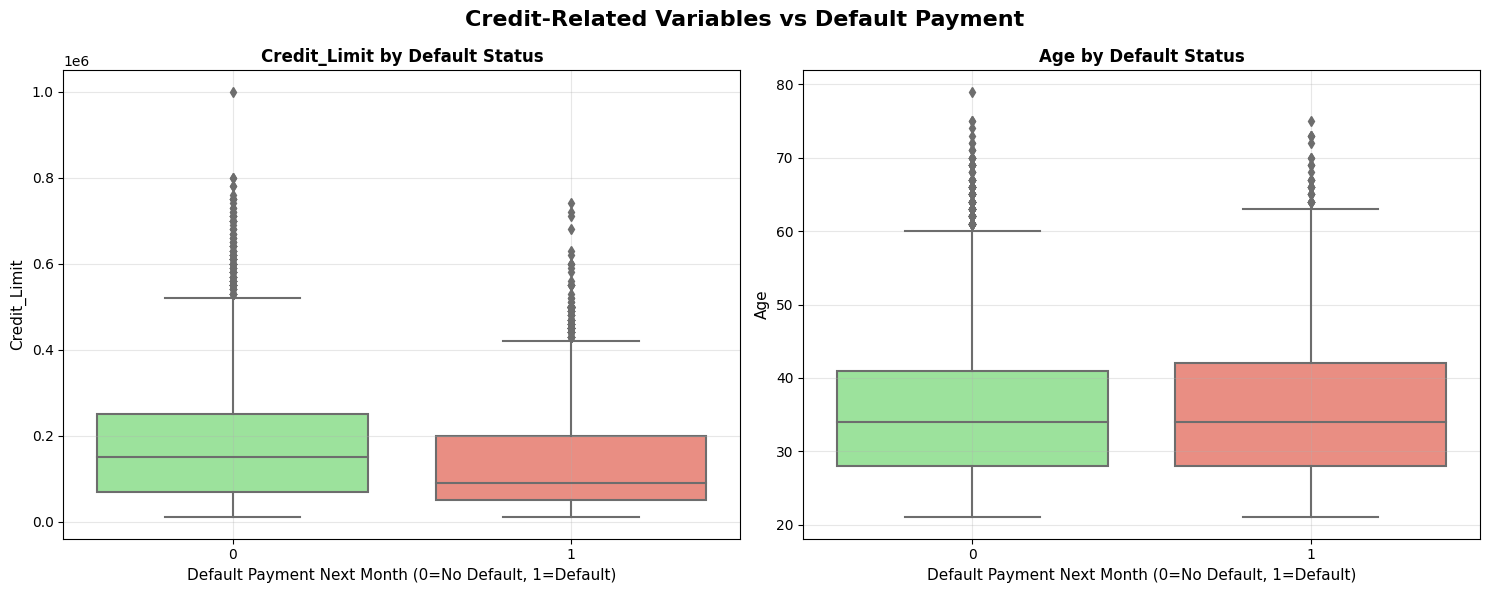

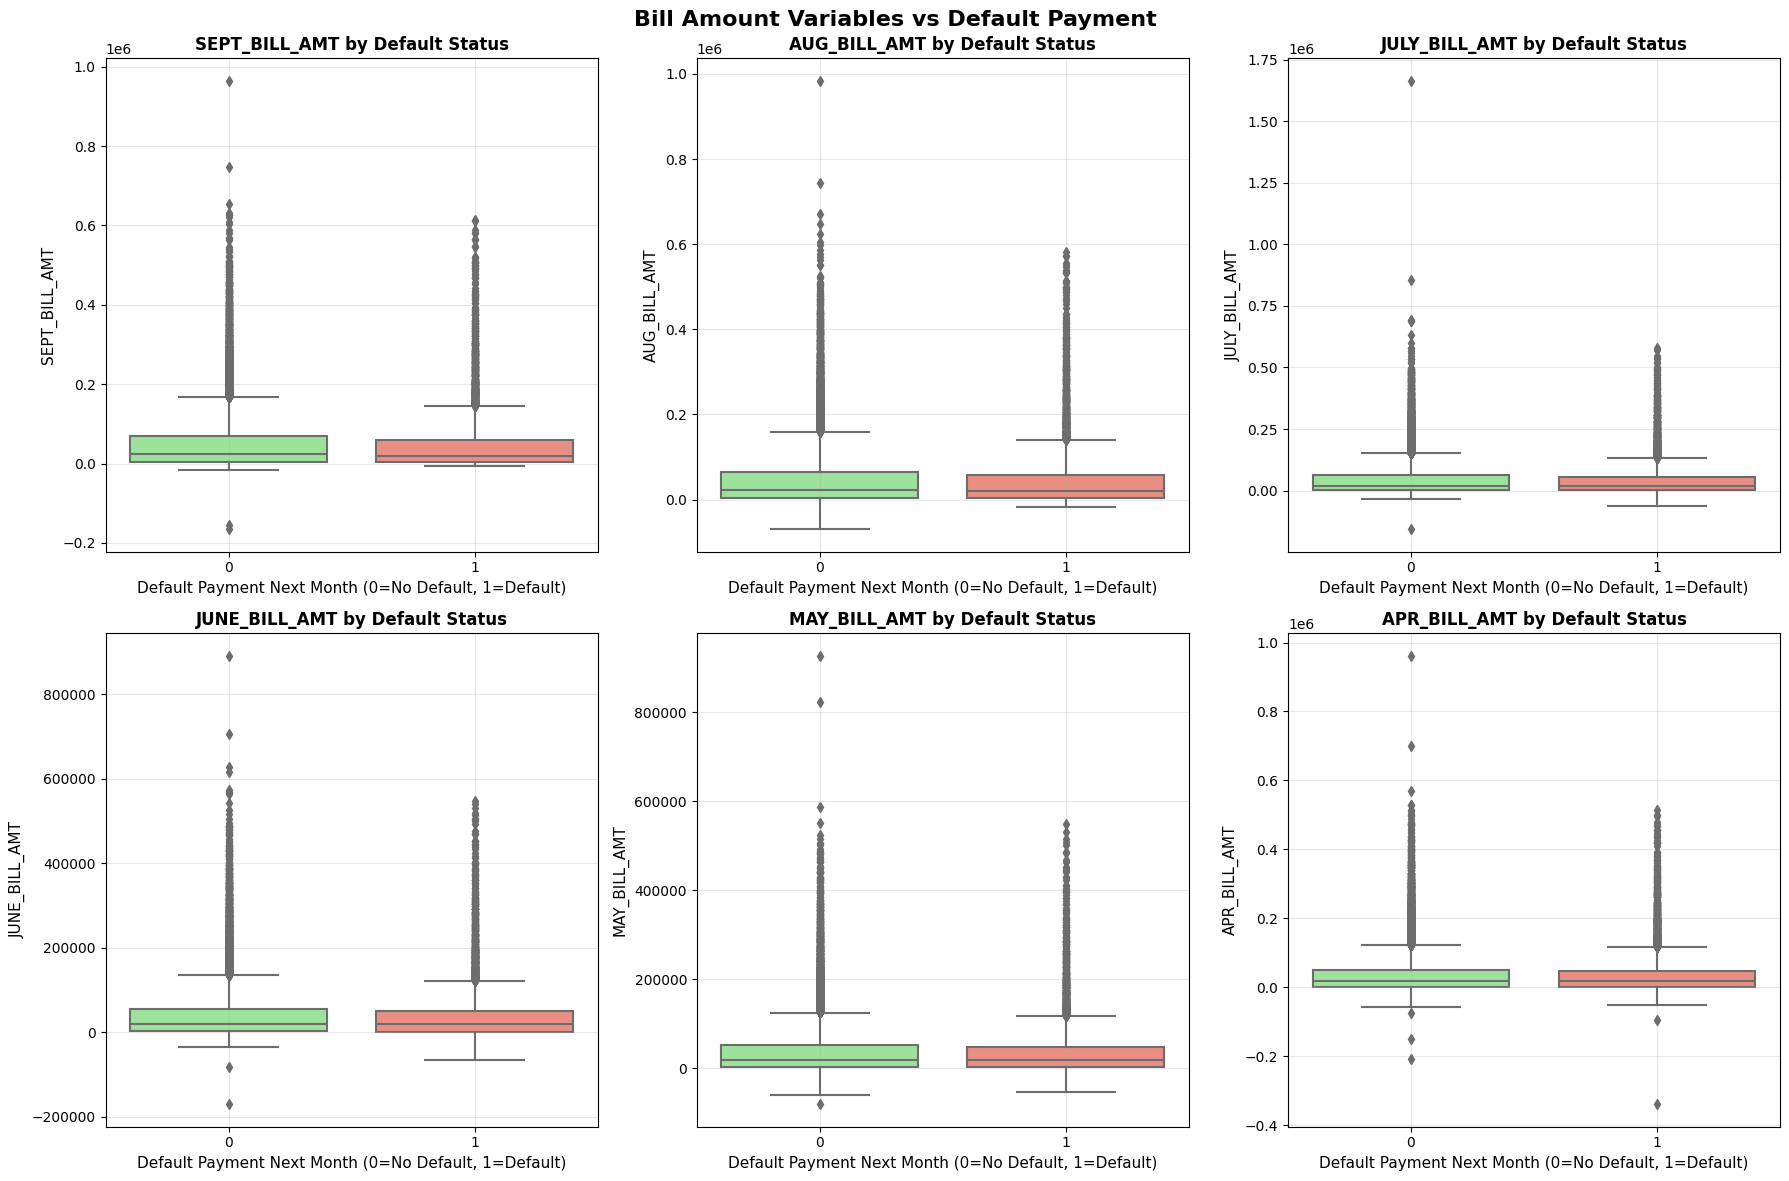

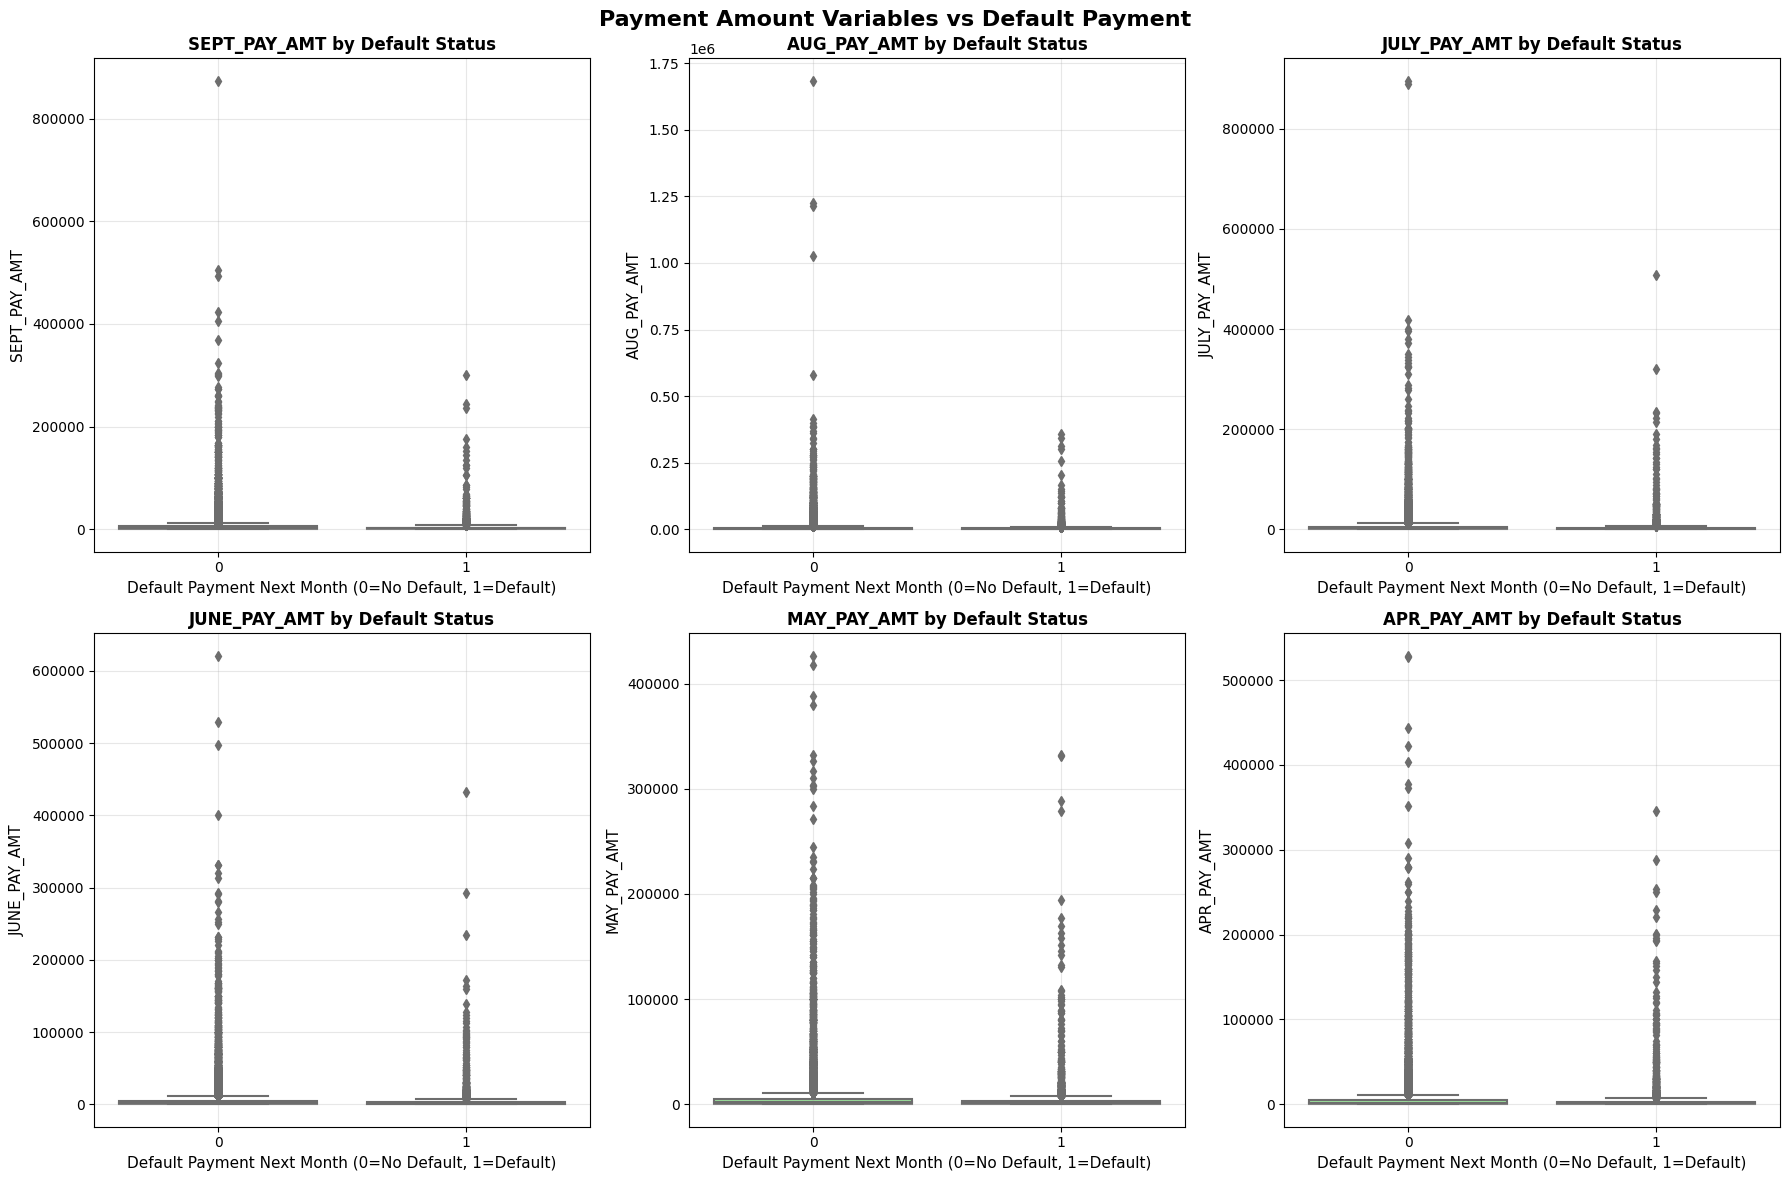

In [35]:
# Visualizing Relationships between Numerical Variables and Target Variable

# 1. Box Plots for Credit-Related Variables vs Default
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Credit-Related Variables vs Default Payment', fontsize=16, fontweight='bold')

for i, col in enumerate(credit_vars):
    sns.boxplot(data=df, x='Default', y=col, ax=axes[i], palette=['lightgreen', 'salmon'])
    axes[i].set_title(f'{col} by Default Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=11)
    axes[i].set_ylabel(col, fontsize=11)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'boxplots_of_credit_related_variables_by_default.png'))
plt.show()

# 2. Box Plots for Bill Amount Variables vs Default
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bill Amount Variables vs Default Payment', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(bill_amt_columns):
    sns.boxplot(data=df, x='Default', y=col, ax=axes[i], palette=['lightgreen', 'salmon'])
    axes[i].set_title(f'{col} by Default Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=11)
    axes[i].set_ylabel(col, fontsize=11)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'boxplots_of_bill_amounts_by_default.png'))
plt.show()

# 3. Box Plots for Payment Amount Variables vs Default
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Payment Amount Variables vs Default Payment', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(pay_amt_columns):
    sns.boxplot(data=df, x='Default', y=col, ax=axes[i], palette=['lightgreen', 'salmon'])
    axes[i].set_title(f'{col} by Default Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=11)
    axes[i].set_ylabel(col, fontsize=11)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'boxplots_of_payment_amounts_by_default.png'))
plt.show()

### **Observations from Numerical Variables vs Target Variable Analysis**
- **Credit-Related Variables:**
    - **Credit_Limit**: Non-defaulters have higher credit limits median vs defaulters. Higher limits correlate with lower default risk.
    - **Age**: Minimal separation between groups. Age alone is not a strong predictor.
- **Bill Amount Variables (APR_BILL_AMT to SEPT_BILL_AMT):**
    - **Pattern**: Defaulters consistently show lower median bill amounts across all months.
    - **Insight**: Lower bills may indicate financial stress or reduced spending before default.
- **Payment Amount Variables (APR_PAY_AMT to SEPT_PAY_AMT):**
    - **Strongest Predictor**: Defaulters have dramatically lower payment amounts across all months.
    - **Pattern**: High frequency of zero/minimal payments in defaulter group.
    - **Insight**: Payment history is the strongest indicator of default risk.
- **Key Insights:**
    - **Predictive Power**: Payment amounts > Bill amounts > Credit limit > Age
    - **Feature Engineering**: Payment-to-bill ratios, payment trends, credit utilization
    - **Business Application**: Use payment history as primary risk assessment factor

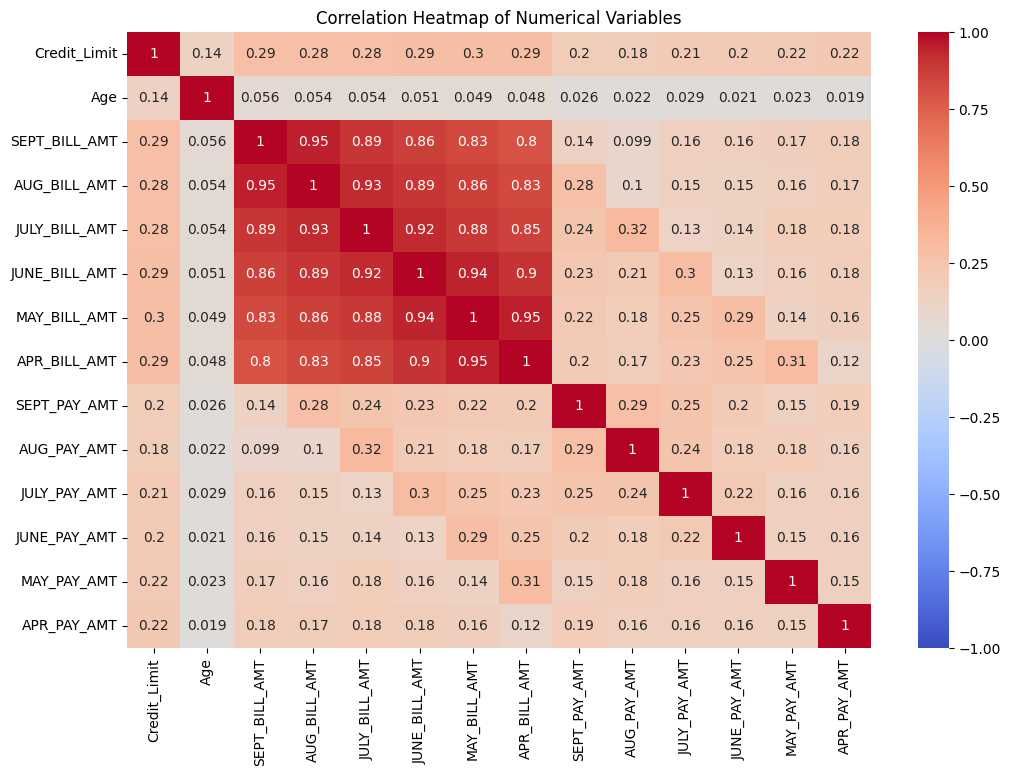

In [28]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.savefig(os.path.join(visualization_outputs, 'correlation_heatmap_of_numerical_variables.png'))
plt.show()

### **Observations from Correlation Heatmap Analysis**
- **Strong Correlations:**
    - **BILL_AMT**: High positive correlations (0.6-0.9) indicating consistent billing patterns across months.
    - **PAY_AMT**: Moderate positive correlations (0.3-0.6) showing payment behavior consistency.
- **Weak Correlations:**
    - **Credit_Limit vs Others**: Low correlations suggest credit limit is independent of usage patterns.
    - **Age vs Others**: Minimal correlations confirm age has limited relationship with financial behavior.
- **Key Insights:**
    - **Feature Redundancy**: High bill amount correlations suggest potential for dimensionality reduction.
    - **Independent Variables**: Credit_Limit and Age provide unique information for modeling.
    - **Pattern Recognition**: Payment amounts show less correlation than bill amounts, indicating more varied payment behaviors.

### **Key Insights from Data Visualization**
- **Distribution Patterns:**
    - All numerical variables show right-skewed distributions requiring log transformation for modeling or using tree based algorithms like Random Forest, Gradient Boosting or XGBoost as they can handle skewed distributions and outliers effectively, making them suitable for this dataset.
    - Credit_Limit and BILL_AMT variables have significant outliers (8-9%) but are valid business cases.
    - Payment amounts (PAY_AMT) show high zero-payment frequency, indicating varied payment behaviors.
- **Class Imbalance:**
    - Target variable shows 77.9% non-defaulters vs 22.1% defaulters, requiring resampling strategies.
    - Gender imbalance exists (around 60% female vs 40% male) but reflects natural customer demographics.
- **Predictive Power Rankings:**
    - Payment history variables (PAY_AMT) show strongest separation between defaulters/non-defaulters.
    - Credit_Limit demonstrate moderate predictive power with higher limits indicating lower risk.
    - Age shows minimal predictive value as a standalone feature.
- **Feature Relationships:**
    - Strong correlations within bill amounts (0.6-0.9) suggest potential dimensionality reduction opportunities.
    - Payment amounts show moderate correlations (0.3-0.6), indicating more independent behavioral patterns.
    - Credit_Limit and Age are largely independent, providing unique information for modeling.
- **Action Items for Modeling:**
    - Apply log transformation for skewed numerical variables or use tree based models.
    - Implement SMOTE or undersampling for class imbalance handling.
    - Consider feature engineering: payment-to-bill ratios, payment trends, credit utilization rates.

# **2. Data Cleaning**

## **2.1 Handling Missing Values**
- We will handle the following data cleaning tasks based on the observations from the data exploration phase:

### **Assumptions:**
- Assuming 0s in Education_Level represents unknown (missing values).
- Assuming 0s in Marital_Status represents missing values.

In [65]:
#Handling Unexpected 0s in Education_Level and Marital_Status
print("Count of 0 values before handling:")
print(f"Count of 0 values in Education_Level: {len(df[df['Education_Level'] == 0])}")
print(f"Count of 0 values in Marital_Status: {len(df[df['Marital_Status'] == 0])}")

# Calculating mode for Education_Level
marital_mode = df['Marital_Status'].mode()[0]
print(f"\nMode of Marital_Status: {marital_mode}")

# Replacing 0s in Marital_Status with mode
df['Marital_Status'] = df['Marital_Status'].replace(0, marital_mode)

# Replacing 0s in Education_Level with 5 (unknown)
df['Education_Level'] = df['Education_Level'].replace(0, 5)

# Verify correction
print("\nCount of 0 values after handling:")
print(f"Education_Level: {len(df[df['Education_Level'] == 0])}")
print(f"Marital_Status: {len(df[df['Marital_Status'] == 0])}")

Count of 0 values before handling:
Count of 0 values in Education_Level: 0
Count of 0 values in Marital_Status: 0

Mode of Marital_Status: 2

Count of 0 values after handling:
Education_Level: 0
Marital_Status: 0


- We replaced 0s in Education_Level with 5(unknown).
- We replaced 0s in Marital_Status with the mode.

## **2.2 Handling Inconsistencies in Categorical Variables**
### **Assumptions:**
- Assuming (5 and 6) values in Education_Level both are same and not a typing error in the documentation as both are (unknown) according to the documentation.
- Assuming -2 in Payment Status variables (APR_PAY to SEPT_PAY) represents "no consumption" and is valid.
- Assuming 0 in Payment Status variables (APR_PAY to SEPT_PAY) represents "no payment required for no consumption" and is valid.

In [ ]:
# Display counts (5,6) unknown in Education_Level
print(f"Education_Level 5: {len(df[df['Education_Level'] == 5])}")
print(f"Education_Level 6: {len(df[df['Education_Level'] == 6])}")

# Replacing 6 in Education_Level with 5 (unknown)
df['Education_Level'] = df['Education_Level'].replace(6, 5)

# Display the updated counts
print(f"Updated Education_Level 5: {len(df[df['Education_Level'] == 5])}")
print(f"Updated Education_Level 6: {len(df[df['Education_Level'] == 6])}")

Updated Education_Level 5: 345
Updated Education_Level 6: 0


- We replaced 6(unknown) in Education_Level with 5(unknown) as both are (unknown) according to the documentation.

In [67]:
# Expected value ranges based on documentation and assumptions
expected_ranges = {
    'Gender': [1, 2],
    'Education_Level': [1, 2, 3, 4, 5],
    'Marital_Status': [1, 2, 3],
    'SEPT_PAY': list(range(-2, 10)),
    'AUG_PAY': list(range(-2, 10)),
    'JULY_PAY': list(range(-2, 10)),
    'JUNE_PAY': list(range(-2, 10)),
    'MAY_PAY': list(range(-2, 10)),
    'APR_PAY': list(range(-2, 10)),
    'Default': [0, 1]  # 0=no, 1=yes
}

# Check for unexpected values
print("Checking for inconsistencies in categorical variables:")
for col in categorical_columns:
    unique_values = df[col].unique()
    unexpected = [x for x in unique_values if x not in expected_ranges[col]]
    if unexpected:
        print(f"{col}: Unexpected values found - {unexpected}")
        print(f"Count of unexpected values: {len(df[df[col].isin(unexpected)])}")
    else:
        print(f"{col}: All values within expected range ({expected_ranges[col]})")

Checking for inconsistencies in categorical variables:
Gender: All values within expected range ([1, 2])
Education_Level: All values within expected range ([1, 2, 3, 4, 5])
Marital_Status: All values within expected range ([1, 2, 3])
SEPT_PAY: All values within expected range ([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
AUG_PAY: All values within expected range ([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
JULY_PAY: All values within expected range ([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
JUNE_PAY: All values within expected range ([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
MAY_PAY: All values within expected range ([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
APR_PAY: All values within expected range ([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Default: All values within expected range ([0, 1])


- All values are within expected ranges based on the documentation and assumptions.